In [291]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [292]:
path = '/Users/stevenfelix/Dropbox/DataScience/Projects/PsychologyToday/data/'
data = pd.read_csv(path+'psychologytoday2017-02-17.txt', sep = '\t')

In [293]:
data.reset_index
del data['Unnamed: 0']
del data['sexualitynum'] # few therapists include this
del data['specialtiesnum'] # PT limits to 3 specialities, so most everyone lists 3
del data['file']

In [294]:
data = data[data.title != 'treatment facility']
data.reset_index(inplace = True)
del data['index']

In [295]:
exclusions = """Group, Associates, Professionals, Boston, Center, New England, Recovery, 
                Massachusetts, Treatment, Network, Newton, Brighton, Arlington, Watertown, 
                Coaching, Consulting, Cambridge, Somerville, Lexington, Waltham""".split(', ')
exclusions = [string.replace('\n', '').replace(' ', '') for string in exclusions]
to_remove = [any(exclusion in title for exclusion in exclusions) for title in data.name]

In [296]:
to_keep = [not b for b in to_remove]

In [297]:
data = data[to_keep]
data.reset_index(inplace = True)
del data['index']
print data.shape
data.head()

(1223, 20)


,name,title,degrees,city,profile,years,school,statelicense,graduated,fee,insurance,specialties,issues,issuesnum,mentalhealth,mentalhealthnum,sexuality,treatmentorientation,treatmentorientationnum,url
0,Kevin Ketchum,counselor,"ms, ma",Brookline,Are you bright and intelligent but struggle wi...,10.0,Boston Graduate School of Psychoanalysis,NaN,2012.0,60.0,NaN,"Anxiety, Depression, Addiction","ADHD, Bipolar Disorder, Developmental Disorder...",11.0,"Dissociative Disorders, Impulse Control Disord...",6.0,"Bisexual, Gay, Lesbian","Family / Marital, Psychoanalytic, Psychodynamic",3.0,https://therapists.psychologytoday.com/rms/pro...
1,Kaynaz Mehta,counselor,"ma, lmhc",Reading,Therapy is about understanding you. Your stren...,9.0,Boston College,7463 Massachusetts,2008.0,110.0,Yes,"Women, Parenting, Anxiety","Addiction, Alcohol Abuse, Career Counseling, C...",20.0,"Mood Disorders, Thinking Disorders",2.0,NaN,"Culturally Sensitive, Eclectic, Emotionally Fo...",11.0,https://therapists.psychologytoday.com/rms/pro...
2,Jan Bergstrom,counselor,lmhc,Arlington,My practice with couples and individuals is no...,20.0,Cambridge College,4548 Massachusetts,1995.0,165.0,NaN,"Relationship Issues, Trauma and PTSD, Parenting","Behavioral Issues, Depression, Divorce, Dual D...",9.0,"Mood Disorders, Thinking Disorders",2.0,"Gay, Lesbian","Co-Dependence Tx, Cognitive Behavioral (CBT), ...",12.0,https://therapists.psychologytoday.com/rms/pro...
3,Peter Guthrie,clinical social work/therapist,licsw,Belmont,Few of us get through life without hitting a b...,20.0,Simmons College School of Social Work,1026571 Massachusetts,1993.0,135.0,Yes,"College/Graduate Students, Relationship Issues...","Anxiety, Coping Skills, Depression, Life Coach...",7.0,Mood Disorders,1.0,NaN,"Cognitive Behavioral (CBT), Eclectic, Psychody...",5.0,https://therapists.psychologytoday.com/rms/pro...
4,Felix Treitler,clinical social work/therapist,"licsw, usta, uspta",Arlington,I make HOME VISITS to clients who cannot trave...,20.0,Simmons School of Social Work,1024337 Massachusetts,1992.0,100.0,Yes,"Depression, Substance Abuse, Life Coaching","12-Step Programs, ADHD, Addiction, Alcohol Abu...",50.0,"Elderly Persons Disorders, Impulse Control Dis...",5.0,"Bisexual, Gay, Lesbian","Activities Combined with Therapy, Coaching, Co...",23.0,https://therapists.psychologytoday.com/rms/pro...


# What are the most common issues treated by Boston  providers?

In [299]:
data.issues.fillna('None', inplace = True)

In [300]:
# list of lists
issues_lists = [issues_str.lower().split(", ") for issues_str in data.issues]

In [303]:
# a single list
issues = []
[issues.extend(l) for l in issues_lists];
print issues[0:15]
print len(issues)

['adhd', 'bipolar disorder', 'developmental disorders', 'drug abuse', 'emotional disturbance', 'intellectual disability', 'obsessive-compulsive (ocd)', 'school issues', 'sexual abuse', 'sleep or insomnia', 'trauma and ptsd', 'addiction', 'alcohol abuse', 'career counseling', 'chronic pain']
18681


In [304]:
issues_set = set(issues)
len(issues_set) # unique issues (very likely some duplication due to spelling and abbreviations)

434

In [305]:
from collections import Counter
issues_count = Counter(issues)

In [306]:
issues_count.most_common(100)

[('self esteem', 836),
 ('grief', 815),
 ('coping skills', 715),
 ('peer relationships', 686),
 ('divorce', 638),
 ('parenting', 623),
 ('family conflict', 621),
 ('relationship issues', 574),
 ('depression', 573),
 ('anxiety', 554),
 ('trauma and ptsd', 553),
 ('emotional disturbance', 475),
 ('adhd', 417),
 ('life coaching', 402),
 ('behavioral issues', 377),
 ('bipolar disorder', 365),
 ('obsessive-compulsive (ocd)', 361),
 ('anger management', 345),
 ('spirituality', 338),
 ('child or adolescent', 337),
 ('school issues', 327),
 ('substance abuse', 323),
 ('addiction', 319),
 ('sexual abuse', 295),
 ('women', 292),
 ('sleep or insomnia', 258),
 ('codependency', 233),
 ('career counseling', 231),
 ('alcohol abuse', 228),
 ('eating disorders', 225),
 ('chronic pain', 220),
 ('adoption', 219),
 ('dual diagnosis', 216),
 ('self-harming', 214),
 ('domestic abuse', 213),
 ('suicidal ideation', 207),
 ('domestic violence', 203),
 ('transgender', 197),
 ('marital and premarital', 193),
 ('

In [307]:
ordered_tuples = issues_count.most_common()
ordered_tuples[0:5]

[('self esteem', 836),
 ('grief', 815),
 ('coping skills', 715),
 ('peer relationships', 686),
 ('divorce', 638)]

In [308]:
# let's isolate the issues that have low endorsement (may be able to combine)
less_than_5_tuples = [(k,v) for k,v in ordered_tuples if v <= 5]
#less_than_5_tuples = sorted(less_than_5_tuples, key = lambda tup: tup[1])
less_than_5_tuples[0:5]

[('college students', 5),
 ('stress management', 4),
 ('christian counseling', 3),
 ('panic disorder', 3),
 ('phobias', 3)]

In [309]:
# might be useful later to have just the keys
less_than_5_keylist = [k for k,v in less_than_5_tuples]
less_than_5_keylist[0:5]

['college students',
 'stress management',
 'christian counseling',
 'panic disorder',
 'phobias']

In [310]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import re

In [311]:
potential_changes = []
for issue in less_than_5_keylist:
    query = issue
    choices = issues_count.keys()
    choices.remove(query)
    choice, match = process.extractOne(query, choices, scorer=fuzz.token_sort_ratio)
    potential_changes.append((query, choice, match))

In [312]:
len(potential_changes)

360

In [313]:
# lets remove duplicates
potential_changes_cop = potential_changes[:]
for i in potential_changes_cop:
    for j in potential_changes_cop[1:]:
        if i[0] == j[1] and i[1] == j[0]:
            potential_changes.remove(j)
del potential_changes_cop          

In [314]:
len(potential_changes) # nice!

231

In [315]:
potential_changes_70 = [(original, proposal, value) for 
                        original, proposal, value in potential_changes if value >=70]

In [316]:
sorted(potential_changes_70, key = lambda x: x[2]) 

# these aren't too bad

[('christian counseling', 'career counseling', 70),
 ('gender identity', 'identity', 70),
 ('developmental trauma', 'developmental disorders', 70),
 ('identity development', 'developmental disorders', 70),
 ('racial and cultural identity', 'racial identity', 70),
 ('migraines ', 'immigration', 70),
 ('personality conflicts', 'antisocial personality', 70),
 ('childhood trauma', 'early childhood', 71),
 ('mindfulness', 'mindfulness mediaton', 71),
 ('social anxiety', 'health anxiety', 71),
 ('multicultural issues', 'medical issues', 71),
 ('coping with medical illness', 'medical illness', 71),
 ('substance abuse assessments', 'substance abuse', 71),
 ('creative process', 'creative issues', 71),
 ('psychodynamics', 'psychoanalysis', 71),
 ('self inquiry', 'self/identity', 72),
 ('sexual desire', 'sexual abuse', 72),
 ('sexual minorities', 'sexual difficulties', 72),
 ('panic disorder', 'eating disorders', 73),
 ('mood disorder', 'hoarding disorder', 73),
 ('life transitions/ executive fun

In [317]:
# lets create a dictionary dict[bad issue] = better issue
changes_dict = {}
for key1,key2,z in potential_changes_70:
    if issues_count[key1] >= issues_count[key2]:
        changes_dict[key2] = key1  # the keys in the dictionary are the less-endorsed issue
    else:
        changes_dict[key1] = key2

In [320]:
# now use dictionary to change issues
for i in range(len(issues)):
    update = changes_dict.get(issues[i])
    if update:
        print '\n' + issues[i] + ' to ' + update
        issues[i] = update

# may need to run multiple times until no more output is given

In [321]:
issues_set = set(issues)
print len(issues_set) # reduced from ~434~

376


In [322]:
issues_count = Counter(issues) # let's update our counter

In [323]:
issuesSeries = pd.Series(issues_count)

In [324]:
issuesSeries.sort_values(inplace = True, ascending = False)
issuesSeries.head(10)

self esteem            838
grief                  815
coping skills          715
peer relationships     689
divorce                638
parenting              624
family conflict        621
relationship issues    574
depression             573
trauma and ptsd        554
dtype: int64

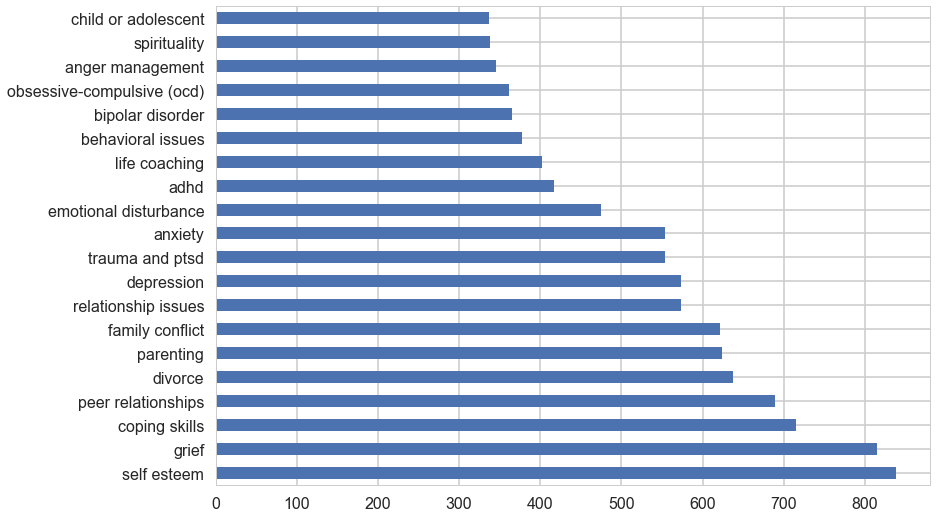

In [326]:
issuesSeries[0:20].plot(kind='barh')